In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report


In [2]:
# Data

from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

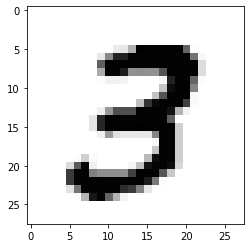

In [7]:
plt.imshow(train_images[7],cmap='Greys')

In [8]:
# Normalize

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [9]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(32,activation = "relu"))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs=3,batch_size=64)

Epoch 1/3
938/938 [==============================] - 3s 2ms/step - loss: 0.4307
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.2259
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.1806


In [12]:
pred_lab = model.predict(test_images)
pred_lab = np.argmax(pred_lab,axis=1)

313/313 [==============================] - 1s 1ms/step


In [13]:
print(classification_report(test_labels,pred_lab))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.97      0.95      1032
           3       0.96      0.92      0.94      1010
           4       0.96      0.95      0.95       982
           5       0.92      0.95      0.94       892
           6       0.96      0.95      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.94      0.93      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



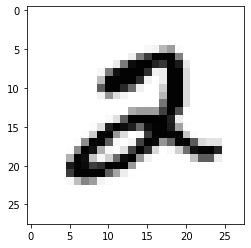

In [14]:
plt.imshow(train_images[5],cmap='Greys')

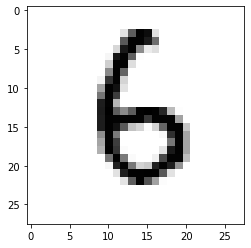

In [15]:
plt.imshow(test_images[21],cmap='Greys')

In [16]:
pred_lab = model.predict(np.array([test_images[21]]))
pred_lab = np.argmax(pred_lab,axis=1)
print(pred_lab)

1/1 [==============================] - 0s 27ms/step
[6]
